July 22nd, 2025


## ECDI-like ensemble varying $n_{c}/n_{e}$ and $T_{c}$

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.testperp import dydt, get_omega_vec

In [3]:
# import for plotting purposes
%matplotlib inline
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
# matplotlib.rcParams['text.usetex'] = True

## Electrostatic perpendicular QLT + reduced dispersion relation equations


In [81]:
# normalization 
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
n_c = 0.9 # n^e_0

omega_0 = 0.5 # Omega_ce
k_0 = 1 # d_e

dB0 = 2.5e-4  # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

omega_pe = 4 # Omgea_{ce}

T = 1

alpha_perp_c = 0.0079 * np.sqrt(T) # d_e x Omega_ce
alpha_i =  0.0079 / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * 0.0079 # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 1e-10
K0 = (alpha_perp_c**2 / 2) * n_c 
T0 = (alpha_perp_c**2 / 2) 

# max time 
t_max = 1300
Nk = 50

# parameteric study 
temperature_study = False
density_study = True

In [82]:
# k vector
if temperature_study:
    if T==0.25:
        k_vec = np.linspace(290, 320, Nk)
    if T==0.5:
        k_vec = np.linspace(240, 320, Nk)
    if T==0.75:
        k_vec = np.linspace(200, 250, Nk)
    if T==1:
        k_vec = np.linspace(175, 220, Nk)
    if T==1.25:
        k_vec = np.linspace(160, 200, Nk)
    if T==1.5:
        k_vec = np.linspace(145, 170, Nk)
    if T==1.75:
        k_vec = np.linspace(135, 160, Nk) 
    if T==2:
        k_vec = np.linspace(127, 160, Nk) 
    if T==2.25:
        k_vec = np.linspace(119, 140, Nk) 
    if T==2.5:
        k_vec = np.linspace(113, 140, Nk) 
    if T==2.75:
        k_vec = np.linspace(108, 125, Nk) 
    if T==3:
        k_vec = np.linspace(103, 125, Nk) 
    dk = np.abs(k_vec[1] - k_vec[0])

In [83]:
# k vector
if density_study:
    if n_c==0.9:
        k_vec = np.linspace(178, 220, Nk)
    if n_c==0.8:
        k_vec = np.linspace(175, 220, Nk)
    if n_c==0.7:
        k_vec = np.linspace(172, 220, Nk)
    if n_c==0.6:
        k_vec = np.linspace(168, 210, Nk)
    if n_c==0.5:
        k_vec = np.linspace(164, 210, Nk)
    if n_c==0.4:
        k_vec = np.linspace(156, 190, Nk)
    if n_c==0.3:
        k_vec = np.linspace(144, 190, Nk)
    if n_c==0.2:
        k_vec = np.linspace(124, 190, Nk)
    if n_c==0.1:
        k_vec = np.linspace(67, 80, Nk)
    dk = np.abs(k_vec[1] - k_vec[0])

In [84]:
sol_ = get_omega_vec(k_vec=k_vec,
                     omega_pe=omega_pe, omega_pi=omega_pi, 
                     v_0=v_0, alpha_i=alpha_i, 
                     alpha_perp_c=alpha_perp_c, 
                     n_c=n_c, omega_0=omega_0)

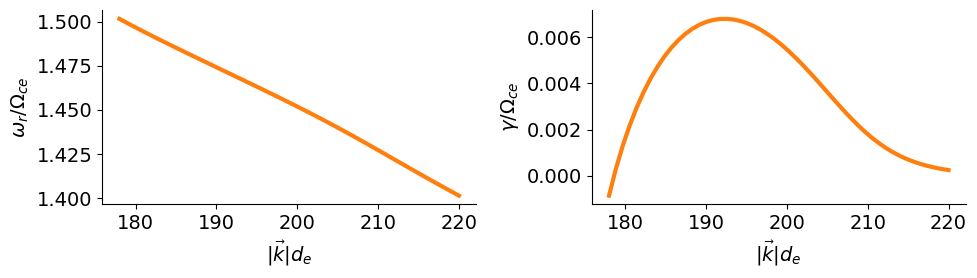

In [85]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
ax[0].plot(k_vec, sol_.real, linewidth=3, color="tab:orange")
ax[0].set_ylabel('$\omega_r/\Omega_{ce}$')
ax[0].set_xlabel(r"$|\vec{k}|d_{e}$")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(k_vec, sol_.imag, color="tab:orange", linewidth=3)
ax[1].set_ylabel('$\gamma/\Omega_{ce}$', rotation=90)
ax[1].set_xlabel(r"$|\vec{k}|d_{e}$")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

In [86]:
if temperature_study:
    np.save("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/gamma_max.npy", np.nanmax(sol_.imag))
    np.save("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/k_max.npy", k_vec[np.nanargmax(sol_.imag)])
if density_study:
    np.save("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/gamma_max.npy", np.nanmax(sol_.imag))
    np.save("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/k_max.npy", k_vec[np.nanargmax(sol_.imag)])

# Run QLT simulation

In [87]:
dE_init = E0 * np.ones(len(k_vec))

# simulate 
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max], 
                                   y0=np.concatenate(([K0], [T0], [dB0], [v_0**2], dE_init)), 
                                   args=(k_vec, omega_pe, omega_pi, k_0, alpha_i, n_c, dk, omega_0, omega_0*3 + 1E-3j, omega_0*3 + 1E-4j, "perp_gamma", False),
                                   atol=1e-6, rtol=1e-6, method='LSODA')

t =  0.0
max gamma =  0.006794524771001774
t =  1.299999999999833
max gamma =  0.006794486733748763
t =  1.299999999999833
max gamma =  0.006794486205994006
t =  2.599999999999666
max gamma =  0.006794447623446902
t =  2.599999999999666
max gamma =  0.006794447087472951
t =  52.57561950254594
max gamma =  0.006792539196790074
t =  52.57561950254594
max gamma =  0.006792422529174644
t =  102.55123900509221
max gamma =  0.006789209822405295
t =  102.55123900509221
max gamma =  0.006788861732487215
t =  152.52685850763848
max gamma =  0.006783075980770315
t =  152.52685850763848
max gamma =  0.006782414515790576
t =  199.39602635510465
max gamma =  0.006772574906941253
t =  199.39602635510465
max gamma =  0.006771510514740345
t =  246.26519420257083
max gamma =  0.006756202373723596
t =  246.26519420257083
max gamma =  0.006754708450383169
t =  293.134362050037
max gamma =  0.006729077447796251
t =  293.134362050037
max gamma =  0.006726302135468135
t =  339.5183631201217
max gamma =  0.0

In [88]:
# save results 
if temperature_study:
    np.save("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/result_y.npy", result.y)
    np.save("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/result_t.npy", result.t)
if density_study:
    np.save("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/result_y.npy", result.y)
    np.save("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/result_t.npy", result.t)

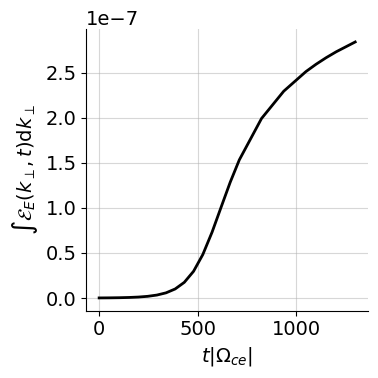

In [89]:
fig, ax = plt.subplots(figsize=(4, 4))
potential_energy = np.sum(result.y[4:, :], axis=0)*dk/(8*np.pi)
ax.plot(result.t, potential_energy, color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../../figs/secondary_QLT/perp/perp_potential_energy.png", dpi=300, bbox_inches='tight')

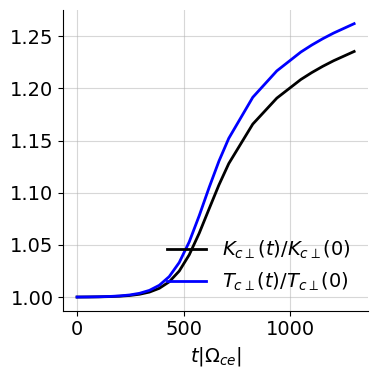

In [90]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="black", linewidth=2, label=r"$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(result.t, result.y[1, :]/result.y[1, 0], color="blue", linewidth=2, label="$T_{c\perp}(t)/T_{c\perp}(0)$")

legend = ax.legend(loc='lower right', ncols=1, fancybox=False, shadow=False, fontsize=14)
legend.get_frame().set_alpha(0)
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../figs/secondary_QLT/perp/perp_kinetic_energy.png", dpi=300, bbox_inches='tight')

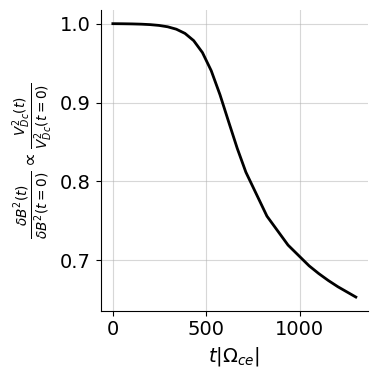

In [91]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[2, :]/result.y[2, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)} \propto \frac{V_{Dc}^2(t)}{V_{Dc}^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../figs/secondary_QLT/perp/perp_magnetic_energy.png", dpi=300, bbox_inches='tight')

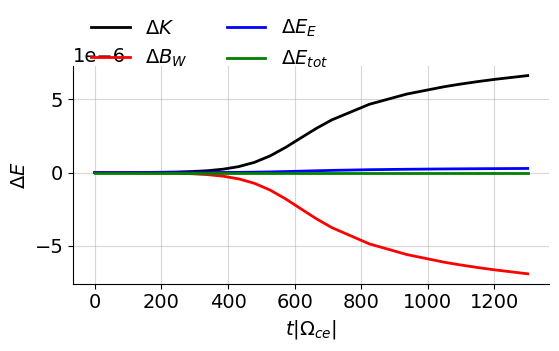

In [97]:
fig, ax = plt.subplots(figsize=(6, 4))
kinetic_energy = result.y[0, :]
potential_energy = np.sum(result.y[4:, :], axis=0)*dk/8/np.pi
magnetic_energy = (1 + (omega_0 / k_0 / np.abs(omega_0 - 1)) ** 2) * result.y[2, :]/8/np.pi 
total_energy = kinetic_energy + magnetic_energy + potential_energy 

ax.plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax.plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W}$")
ax.plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax.plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

#ax.set_yscale("symlog", linthresh=1e-10)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\Delta E$')

legend = ax.legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5) 
plt.tight_layout()

# plt.savefig("../figs/secondary_QLT/perp/perp_conservation_of_energy.png", dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '$\\mathcal{E}_{E}(k_{\\perp}, t)$')

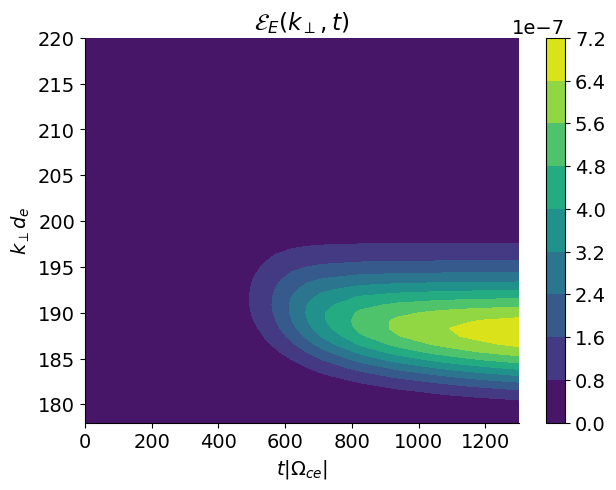

In [93]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.contourf(result.t, k_vec, result.y[4:], cmap="viridis",  levels=10)
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$k_{\perp} d_{e}$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}_{E}(k_{\perp}, t)$")
#plt.savefig("../figs/secondary_QLT/perp/electric_energy_spectrum_n_c_" + str(n_c) + ".png", dpi=300, bbox_inches='tight')

# Read ensemble results density 

In [94]:
n_c_vector = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

dB_final_perp = np.zeros(len(n_c_vector))
T_final_perp = np.zeros(len(n_c_vector))
gamma_max_perp = np.zeros(len(n_c_vector))
k_max_perp = np.zeros(len(n_c_vector))


dB_final_oblique = np.zeros(len(n_c_vector))
T_final_oblique = np.zeros(len(n_c_vector))
gamma_max_oblique = np.zeros(len(n_c_vector))
k_max_oblique = np.zeros(len(n_c_vector))

In [95]:
ii=0
for n_c in n_c_vector:
    result_y = np.load("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/result_y.npy")
    dB_final_perp[ii] = 1 - result_y[2, -1]/result_y[2, 0]
    T_final_perp[ii] = result_y[1, -1]/result_y[1, 0]
    gamma_max_perp[ii] = np.load("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/gamma_max.npy")
    k_max_perp[ii] = np.load("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/perpendicular/k_max.npy")

    result_y = np.load("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/oblique/result_y.npy")
    dB_final_oblique[ii] = (1 - result_y[4, -1]/result_y[4, 0]) * 4/5
    T_final_oblique[ii] = result_y[3, -1]/result_y[3, 0] 
    gamma_max_oblique[ii] = np.load("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/oblique/gamma_max.npy")
    k_max_oblique[ii] = np.load("../../data/ensemble_QLT_secondary/density/n_c_" + str(n_c) + "/oblique/k_max.npy")
    ii+=1

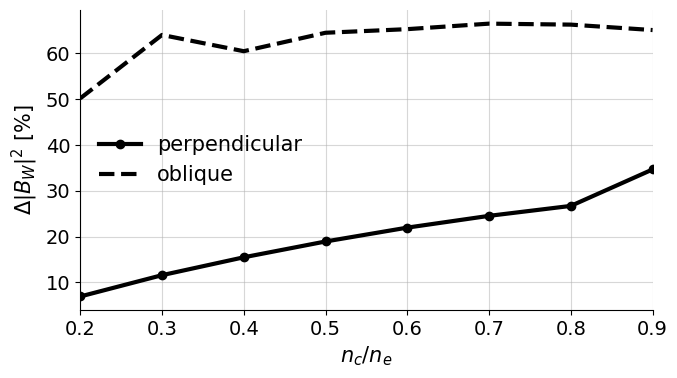

In [96]:
fig, ax1 = plt.subplots(figsize=(7, 4))

# Left y-axis: percent damped
ax1.plot(n_c_vector, dB_final_perp * 100, "-o", color="black", linewidth=3, label="perpendicular")
ax1.plot(n_c_vector, dB_final_oblique * 100, "--", color="black", linewidth=3, label="oblique")

ax1.set_xlabel(r"$n_{c}/n_{e}$", fontsize=15)
ax1.set_ylabel(r"$\Delta |B_{W}|^2$ [%]", fontsize=15, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlim(0.2, 0.9)

# Grid and layout
ax1.grid(alpha=0.5)
legend = ax1.legend(loc='center left', ncols=1, fancybox=False, shadow=False, fontsize=15)
legend.get_frame().set_alpha(0)


fig.tight_layout()

# Save figure
plt.savefig("../../figs/secondary_QLT/N_QLT_dB.png", dpi=400, bbox_inches='tight')

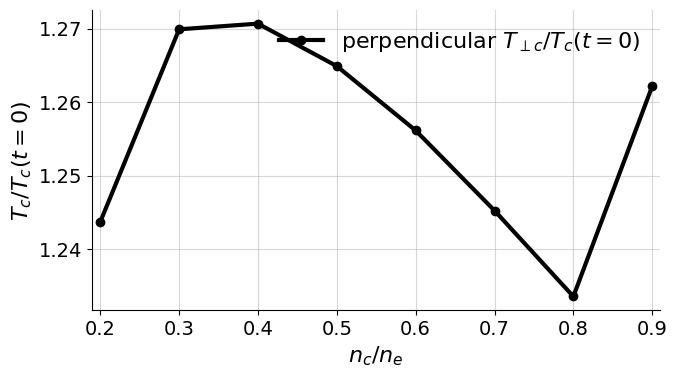

In [76]:
fig, ax2 = plt.subplots(figsize=(7, 4))
ax2.plot(n_c_vector, T_final_perp, "-o", linewidth=3, color="black", label=r"perpendicular $T_{\perp c}/T_{c}(t=0)$")
#ax2.plot(n_c_vector, T_final_oblique, "--", linewidth=3, color="black", label=r"oblique $T_{\| c}/T_{c}(t=0)$")

ax2.set_ylabel(r"$T_{c}/T_{c}(t=0)$ ", fontsize=16)
ax2.set_xlabel(r"$n_{c}/n_{e}$", fontsize=16)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax2.set_xlim(0.19, 0.91)


# Grid and layout
ax2.grid(alpha=0.5)
legend = ax2.legend(loc='upper right', ncols=1, fancybox=False, shadow=False, fontsize=16)
legend.get_frame().set_alpha(0)

fig.tight_layout()

# Save figure
plt.savefig("../../figs/secondary_QLT/N_QLT_dT.png", dpi=400, bbox_inches='tight')

# Read ensemble results temperature

In [77]:
T_vec = [0.5, 0.75, 1, 1.25, 1.5,1.75, 2, 2.25, 2.5, 2.75, 3]

dB_final_perp = np.zeros(len(T_vec))
T_final_perp = np.zeros(len(T_vec))
gamma_max_perp = np.zeros(len(T_vec))
k_max_perp = np.zeros(len(T_vec))


dB_final_oblique = np.zeros(len(T_vec))
T_final_oblique = np.zeros(len(T_vec))
gamma_max_oblique = np.zeros(len(T_vec))
k_max_oblique = np.zeros(len(T_vec))

In [78]:
ii=0
for T in T_vec:
    result_y = np.load("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/result_y.npy")
    dB_final_perp[ii] = 1 - result_y[2, -1]/result_y[2, 0]
    T_final_perp[ii] = result_y[1, -1]/result_y[1, 0] 
    gamma_max_perp[ii] = np.load("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/gamma_max.npy")
    k_max_perp[ii] = np.load("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/perpendicular/k_max.npy")


    result_y = np.load("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/oblique/result_y.npy")
    dB_final_oblique[ii] = (1 - result_y[4, -1]/result_y[4,0])*4/5
    T_final_oblique[ii] = result_y[3, -1]/result_y[3, 0] 
    gamma_max_oblique[ii] = np.load("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/oblique/gamma_max.npy")
    k_max_oblique[ii] = np.load("../../data/ensemble_QLT_secondary/temperature/T_" + str(T) + "/oblique/k_max.npy")
    ii+=1

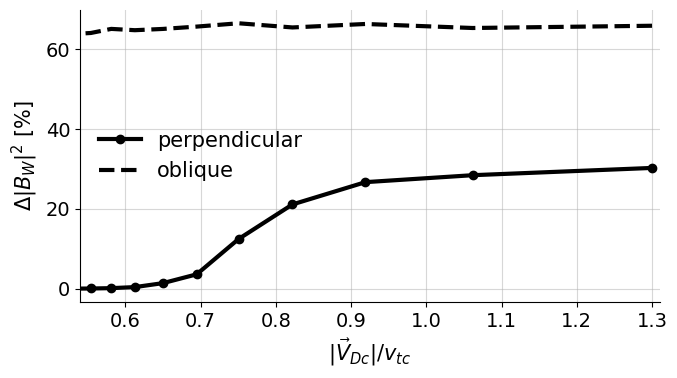

In [79]:
fig, ax1 = plt.subplots(figsize=(7, 4))

# Left y-axis: percent damped
ax1.plot(0.65/np.sqrt(T_vec)*np.sqrt(2), dB_final_perp * 100, "-o", color="black", linewidth=3, label="perpendicular")
ax1.plot(0.65/np.sqrt(T_vec)*np.sqrt(2), dB_final_oblique * 100, "--", color="black", linewidth=3, label="oblique")

ax1.set_xlabel(r"$|\vec{V}_{Dc}|/v_{tc}$", fontsize=15)
ax1.set_ylabel(r"$\Delta |B_{W}|^2$ [%]", fontsize=15, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlim(0.54, 1.31)

# Grid and layout
ax1.grid(alpha=0.5)
legend = ax1.legend(loc='center left', ncols=1, fancybox=False, shadow=False, fontsize=15)
legend.get_frame().set_alpha(0)


fig.tight_layout()

# Save figure
plt.savefig("../../figs/secondary_QLT/T_QLT_dB.png", dpi=400, bbox_inches='tight')

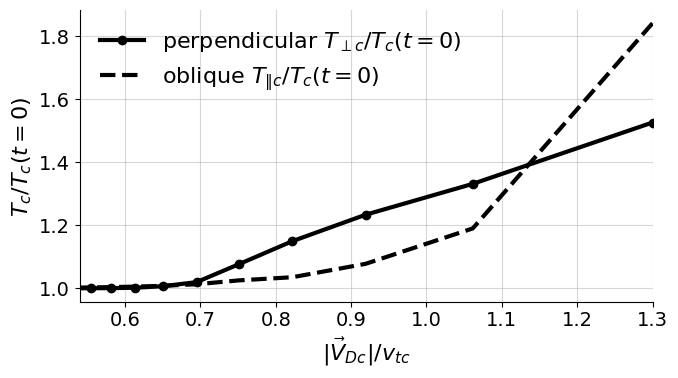

In [80]:
fig, ax2 = plt.subplots(figsize=(7, 4))
ax2.plot(0.65/np.sqrt(T_vec)*np.sqrt(2), T_final_perp, "-o", linewidth=3, color="black", label=r"perpendicular $T_{\perp c}/T_{c}(t=0)$")
ax2.plot(0.65/np.sqrt(T_vec)*np.sqrt(2), T_final_oblique, "--", linewidth=3, color="black", label=r"oblique $T_{\| c}/T_{c}(t=0)$")

ax2.set_ylabel(r"$T_{c}/T_{c}(t=0)$ ", fontsize=16)
ax2.set_xlabel(r"$|\vec{V}_{Dc}|/v_{tc}$", fontsize=16)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax2.set_xlim(0.54, 1.3)


# Grid and layout
ax2.grid(alpha=0.5)
legend = ax2.legend(loc='upper left', ncols=1, fancybox=False, shadow=False, fontsize=16)
legend.get_frame().set_alpha(0)

fig.tight_layout()

# Save figure
plt.savefig("../../figs/secondary_QLT/T_QLT_dT.png", dpi=400, bbox_inches='tight')